In [82]:
import os
from glob import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time

In [84]:
paths_training = glob('/Users/ybbaek/PycharmProjects/Datasets/data_img/img_metal_training/*/*/*.jpg')
paths_test = glob('/Users/ybbaek/PycharmProjects/Datasets/data_img/img_metal_test/*/*/*.jpg')

In [85]:
paths_training[0] ,paths_test[0]

('/Users/ybbaek/PycharmProjects/Datasets/data_img/img_metal_training/07_lego/lego_img/1_28x28_lego_123.jpg',
 '/Users/ybbaek/PycharmProjects/Datasets/data_img/img_metal_test/07_lego/lego_img/1_28x28_lego_321.jpg')

In [10]:
len(paths_training), len(paths_test)

(2100, 420)

In [11]:
def get_label_from_path(path):
    str = (path.split('/')[-3])
    return int(str.split('_')[0])

In [13]:
get_label_from_path(paths_training[0]), get_label_from_path(paths_test[0])

(7, 7)

In [15]:
image = np.array(Image.open(paths_training[0])) 

In [16]:
image.shape

(28, 28)

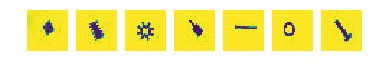

In [19]:
for i in range(7):
    plt.subplot(1,7, i+1)
    plt.axis('off')
    plt.imshow(np.array(Image.open(paths_training[i*300])))

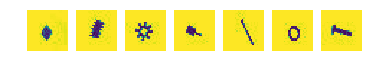

In [22]:
for i in range(7):
    plt.subplot(1,7, i+1)
    plt.axis('off')
    plt.imshow(np.array(Image.open(paths_test[i*60])))

In [25]:
def read_image(path):
    image = np.array(Image.open(path))
    image = np.reshape(image, np.product(image.shape))
    return image

In [27]:
image = read_image(paths_training[0])
image.shape

(784,)

In [45]:
def onehot_encode_label(path):
    onehot_label = unique_label_names == get_label_from_path(path)
    onehot_label = onehot_label.astype(np.uint8)
    return onehot_label

In [28]:
image = read_image(paths_test[0])
image.shape

(784,)

In [37]:
labels_train = []
for path in paths_training:
    labels_train.append(get_label_from_path(path))

In [38]:
labels_test = []
for path in paths_test:
    labels_test.append(get_label_from_path(path))

In [40]:
len(labels_train), len(labels_test)

(2100, 420)

In [43]:
unique_label_names = np.unique(labels_train)
unique_label_names

array([1, 2, 3, 4, 5, 6, 7])

In [44]:
unique_label_names = np.unique(labels_test)
unique_label_names

array([1, 2, 3, 4, 5, 6, 7])

In [48]:
onehot_encode_label(paths_training[0])

array([0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [49]:
onehot_encode_label(paths_test[0])

array([0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [50]:
read_image(paths_training[0]).shape

(784,)

In [51]:
read_image(paths_test[0]).shape

(784,)

In [87]:
batch_size = 30
test_size = 60
img_h = 28
img_w = 28
ch_n = 1
num_class = 7
num_trainingfiles = len(paths_training) #2100
num_testfiles = len(paths_test)

Img1D_size = 784

TB_SUMMARY_DIR = './log'

In [53]:
batch_image = np.zeros((batch_size, Img1D_size))
batch_label = np.zeros((batch_size, num_class))

In [54]:
batch_image.shape, batch_label.shape

((30, 784), (30, 7))

In [55]:
test_image = np.zeros((test_size, Img1D_size))
test_label = np.zeros((test_size, num_class))

In [56]:
test_image.shape, test_label.shape

((60, 784), (60, 7))

In [57]:
for n, path in enumerate(paths_training[:batch_size]):
    image = read_image(path)
    onehot_label = onehot_encode_label(path)
    batch_image[n,: ] = image
    batch_label[n,: ] = onehot_label

In [58]:
for n, path in enumerate(paths_test[:test_size]):
    image = read_image(path)
    onehot_label = onehot_encode_label(path)
    test_image[n,: ] = image
    test_label[n,: ] = onehot_label

In [60]:
batch_image.shape, batch_label.shape

((30, 784), (30, 7))

In [62]:
test_image.shape, test_label.shape

((60, 784), (60, 7))

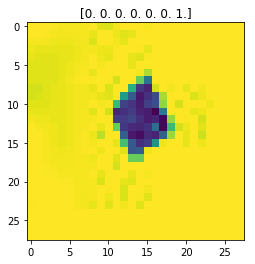

In [63]:
plt.title(batch_label[0])
plt.imshow(np.reshape(batch_image[0],(28,28)))
plt.show()

In [65]:
import tensorflow as tf
from layers import conv_layer, max_pool_2x2, full_layer

/Users/ybbaek/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [66]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_= tf.placeholder(tf.float32, shape=[None,  7])

In [67]:
x_image = tf.reshape(x, [-1, 28, 28, 1])

In [68]:
conv1 = conv_layer(x_image, shape=[5, 5, 1, 32])
conv1_pool = max_pool_2x2(conv1)
conv2 = conv_layer(conv1_pool, [5, 5, 32, 64])
conv2_pool = max_pool_2x2(conv2)
conv2_flat = tf.reshape(conv2_pool, [-1, 7*7*64])
full_1 = tf.nn.relu(full_layer(conv2_flat, 1024))

In [69]:
keep_prob = tf.placeholder(tf.float32)
full1_drop = tf.nn.dropout(full_1, keep_prob = keep_prob)

In [70]:
y_conv = full_layer(full1_drop, 7)

In [71]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=y_conv, labels=y_))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [72]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [73]:
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_,1))

In [74]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [91]:
STEPS = 15
global_step =0

In [93]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    #전체 epoch
    for i in range(STEPS): 
        start_t = time.clock()
        # 배치세트
        for j in range(num_trainingfiles // batch_size):
            #미니배치 생성
            for n, path in enumerate(paths_training[batch_size*j:batch_size*(j+1)]):
                image = read_image(path)
                onehot_label = onehot_encode_label(path)
                batch_image[n,: ] = image
                batch_label[n,: ] = onehot_label
                #print(batch_image.shape, batch_label.shape)
                #print(path,onehot_label)
                
            sess.run(train_step, feed_dict={x: batch_image, y_: batch_label, keep_prob: 0.5})
            #print(batch_label[0], image[0])
            #plt.imshow(np.reshape(batch_image[0],(28,28)))
            #plt.show()
            
            if j % 10 ==0:
                train_accuracy = sess.run(accuracy, feed_dict={x: batch_image, y_:batch_label, keep_prob: 1.0})
                print("step {:4d}, training accuracy = {:.3f}".format(i, train_accuracy))
        
        #sess.run(train_step, feed_dict={x: batch_image, y_: batch_label, keep_prob: 0.5})
        global_step +=1
        
        end_t = time.clock()
        
    for k in range(num_testfiles // test_size):
        for n, path in enumerate(paths_test[test_size*k:test_size*(k+1)]):
            image = read_image(path)
            onehot_label = onehot_encode_label(path)
            test_image[n, :] = image
            test_label[n, :] = onehot_label
        
        X = test_image
        Y = test_label
        
        test_accuracy = sess.run(accuracy, feed_dict={x: X, y_: Y, keep_prob: 1.0})
        print(test_accuracy)


step    0, training accuracy = 0.000
step    0, training accuracy = 0.000
step    0, training accuracy = 0.000
step    0, training accuracy = 0.000
step    0, training accuracy = 0.000
step    0, training accuracy = 0.000
step    0, training accuracy = 0.000
step    1, training accuracy = 0.000
step    1, training accuracy = 0.000
step    1, training accuracy = 0.000
step    1, training accuracy = 0.000
step    1, training accuracy = 0.000
step    1, training accuracy = 0.000
step    1, training accuracy = 0.000
step    2, training accuracy = 0.000
step    2, training accuracy = 0.000
step    2, training accuracy = 0.000
step    2, training accuracy = 0.000
step    2, training accuracy = 0.000
step    2, training accuracy = 0.000
step    2, training accuracy = 0.000
step    3, training accuracy = 0.000
step    3, training accuracy = 0.000
step    3, training accuracy = 0.000
step    3, training accuracy = 0.000
step    3, training accuracy = 0.000
step    3, training accuracy = 0.000
s

In [59]:
test_accuracy

1.0